# INTRO

There are two separate target columns to predict, each in dataset 1 and dataset 2.

This notebook is about dataset 1

# 1. GETTING READY

In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sb
import os

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from fast_ml.feature_selection import get_duplicate_features
from fast_ml.feature_selection import get_constant_features

In [2]:
#import dataset
df = pd.read_csv("../data/dataset_1.csv")

# 2. SPLITTING

In [3]:
# data on which we base
X = df.drop(columns=['target'])

# data which we predict
y = df['target']

In [4]:
# getting train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=42
)

# getting test and validation sets
X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, stratify=y_test, test_size=0.3, random_state=42
)

In [5]:
# checking shapes of X's
print(X.shape, X_train.shape, X_test.shape, X_val.shape)

(50000, 300) (35000, 300) (10500, 300) (4500, 300)


In [6]:
# checking shapes of y's
print(y.shape, y_train.shape, y_test.shape, y_val.shape)

(50000,) (35000,) (10500,) (4500,)


# EXPORTING

In [7]:
# exporting data
relative_path = "./validation"

if not os.path.exists(relative_path):
    os.makedirs(relative_path)

X_train.to_csv('validation/X_train_dataset_1.csv', encoding='utf-8')
X_test.to_csv('validation/X_test_dataset_1.csv', encoding='utf-8')
X_val.to_csv('validation/X_val_dataset_1.csv', encoding='utf-8')

y_train.to_csv('validation/y_train_dataset_1.csv', encoding='utf-8')
y_test.to_csv('validation/y_test_dataset_1.csv', encoding='utf-8')
y_val.to_csv('validation/y_val_dataset_1.csv', encoding='utf-8')

### in theory outliers, NAs handling and NAs replacing should be before features number reduction. Otherwise NAs replacing can produce type of columns that could have been handled with features number reduction methods (which was already done). Alas, doing so would mean analysing 300 separeted histogram plots manually so as to determine whether column has outlier or not which is not impossible but undoubtadly needlessly hard. So we decided to reduce number of features first and then whilst having only few columns (~50) look for possible outliers through plots

# 2. DATASET INFO

In [8]:
# first five rows
X_train.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_291,var_292,var_293,var_294,var_295,var_296,var_297,var_298,var_299,var_300
13889,0,0,0.0,2.88,0.0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0.0,0.0
18173,0,0,0.0,2.91,0.0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0.0,0.0
11779,0,0,0.0,2.82,0.0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0.0,0.0
28068,0,0,0.0,5.82,0.0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0.0,0.0
26232,0,0,0.0,0.00,0.0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0.0,0.0


In [9]:
y_train.head()

13889    0
18173    0
11779    0
28068    0
26232    0
Name: target, dtype: int64

In [10]:
# shape
X_train.shape

(35000, 300)

In [11]:
# info
X_train.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35000 entries, 13889 to 47738
Data columns (total 300 columns):
 #    Column   Non-Null Count  Dtype  
---   ------   --------------  -----  
 0    var_1    35000 non-null  int64  
 1    var_2    35000 non-null  int64  
 2    var_3    35000 non-null  float64
 3    var_4    35000 non-null  float64
 4    var_5    35000 non-null  float64
 5    var_6    35000 non-null  int64  
 6    var_7    35000 non-null  int64  
 7    var_8    35000 non-null  int64  
 8    var_9    35000 non-null  int64  
 9    var_10   35000 non-null  int64  
 10   var_11   35000 non-null  float64
 11   var_12   35000 non-null  float64
 12   var_13   35000 non-null  float64
 13   var_14   35000 non-null  int64  
 14   var_15   35000 non-null  int64  
 15   var_16   35000 non-null  float64
 16   var_17   35000 non-null  float64
 17   var_18   35000 non-null  float64
 18   var_19   35000 non-null  int64  
 19   var_20   35000 non-null  int64  
 20   var_21   35000 non-nul

In [12]:
# description
X_train.describe()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_291,var_292,var_293,var_294,var_295,var_296,var_297,var_298,var_299,var_300
count,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,3.500000e+04,35000.000000,35000.000000,35000.000000,35000.000000,...,35000.000000,35000.000000,35000.000000,35000.0,35000.000000,35000.000000,35000.0,35000.000000,35000.000000,3.500000e+04
mean,0.002229,0.000029,16.754658,3.152425,623.621139,5.714286e+03,0.000257,0.033257,0.000257,0.000257,...,0.006686,0.083938,0.010114,0.0,0.128229,0.085200,0.0,0.003343,15.130148,5.643619e+03
std,0.113369,0.005345,1426.650119,2.745780,10899.867683,7.559181e+05,0.027774,0.314115,0.027774,0.035856,...,0.143274,1.107691,0.212500,0.0,0.608109,0.603805,0.0,0.082914,952.917261,4.711153e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00
50%,0.000000,0.000000,0.000000,2.850000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00
75%,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00
max,9.000000,1.000000,207901.336500,35.280000,445500.000000,1.000000e+08,3.000000,3.000000,3.000000,6.000000,...,6.000000,74.520000,12.000000,0.0,6.000000,33.000000,0.0,3.000000,134666.681100,2.857673e+06


# 4. FEATURES NUMBER REDUCTION

## 4.1. Duplicate features

In [13]:
# looking for duplicate features
# duplicate features are whern two columns X and Y have same value for every index

duplicate_features = get_duplicate_features(X_train)

print(duplicate_features.shape)
duplicate_features.head()

(121, 3)


,Desc,feature1,feature2
0,Duplicate Values,var_43,var_106
1,Duplicate Values,var_14,var_129
2,Duplicate Values,var_14,var_158
3,Duplicate Values,var_14,var_167
4,Duplicate Values,var_14,var_171


In [14]:
# what are types of duplicates
duplicate_features['Desc'].unique()

array(['Duplicate Values', 'Duplicate Index'], dtype=object)

In [15]:
# flatten dataframe with duplicate features to list
duplicate_features = duplicate_features[duplicate_features['Desc'] == 'Duplicate Values']['feature2'].tolist()
print(duplicate_features)

['var_106', 'var_129', 'var_158', 'var_167', 'var_171', 'var_285', 'var_182', 'var_195', 'var_196', 'var_212', 'var_215', 'var_225', 'var_250', 'var_248', 'var_287', 'var_294', 'var_297', 'var_183', 'var_104', 'var_239', 'var_296', 'var_148', 'var_223', 'var_216', 'var_289', 'var_199', 'var_227', 'var_180', 'var_178', 'var_135', 'var_201', 'var_127', 'var_80', 'var_269', 'var_116', 'var_232', 'var_263', 'var_122', 'var_23', 'var_33', 'var_44', 'var_66', 'var_67', 'var_69', 'var_61', 'var_81', 'var_120', 'var_113', 'var_112', 'var_151', 'var_92', 'var_97', 'var_87', 'var_99']


In [16]:
# drop duplicate features and show difference
print('X_train shape before dropping duplicates: ', X_train.shape)
X_train.drop(columns = duplicate_features, inplace=True)
print('X_train shape after dropping duplicates: ', X_train.shape)

X_train shape before dropping duplicates:  (35000, 300)
X_train shape after dropping duplicates:  (35000, 246)


In [17]:
# function to pipeline - transformer
def drop_duplicate_features(df):
    duplicate_features = get_duplicate_features(df)
    duplicate_features['Desc'].unique()
    duplicate_features = duplicate_features[duplicate_features['Desc'] == 'Duplicate Values']['feature2'].tolist()
    df.drop(columns = duplicate_features, inplace=True)

## 4.2. Constant features

In [18]:
# looking for constant features
constant_features = get_constant_features(X_train)

print(constant_features.shape)
constant_features.head()

(125, 4)


,Desc,Var,Value,Perc
0,Constant,var_14,0.0,100.000000
1,Constant,var_89,0.0,100.000000
2,Quasi Constant,var_170,0.0,99.997143
3,Quasi Constant,var_34,0.0,99.997143
4,Quasi Constant,var_234,0.0,99.997143


In [19]:
# what are types of constant features
constant_features['Desc'].unique()

array(['Constant', 'Quasi Constant'], dtype=object)

In [20]:
# flatten dataframe with constant columns to list
constant_features = constant_features[constant_features['Perc'] > 98]['Var'].tolist()
print(constant_features)
print("number of columns", len(constant_features))

['var_14', 'var_89', 'var_170', 'var_34', 'var_234', 'var_243', 'var_247', 'var_124', 'var_73', 'var_2', 'var_133', 'var_280', 'var_283', 'var_36', 'var_72', 'var_65', 'var_150', 'var_111', 'var_153', 'var_187', 'var_189', 'var_210', 'var_217', 'var_141', 'var_228', 'var_10', 'var_28', 'var_6', 'var_12', 'var_233', 'var_11', 'var_7', 'var_265', 'var_9', 'var_71', 'var_20', 'var_267', 'var_146', 'var_221', 'var_257', 'var_59', 'var_90', 'var_126', 'var_149', 'var_204', 'var_274', 'var_136', 'var_1', 'var_3', 'var_202', 'var_138', 'var_264', 'var_95', 'var_184', 'var_235', 'var_60', 'var_42', 'var_290', 'var_142', 'var_237', 'var_77', 'var_299', 'var_45', 'var_53', 'var_78', 'var_254', 'var_260', 'var_219', 'var_211', 'var_43', 'var_224', 'var_246', 'var_197', 'var_32', 'var_24', 'var_102', 'var_48', 'var_125', 'var_115', 'var_98', 'var_282', 'var_159', 'var_39', 'var_286', 'var_298', 'var_245', 'var_40', 'var_236', 'var_249', 'var_16', 'var_130', 'var_56', 'var_291', 'var_251', 'var_194

In [21]:
# drop constant features and show difference
print('X_train shape before dropping constant features: ', X_train.shape)
X_train.drop(columns = constant_features, inplace=True)
print('X_train shape after dropping constant features: ', X_train.shape)

X_train shape before dropping constant features:  (35000, 246)
X_train shape after dropping constant features:  (35000, 121)


In [22]:
# function to pipeline - transformer
def drop_constant_features(df):
    constant_features = get_constant_features(df)
    constant_features['Desc'].unique()
    constant_features = constant_features[constant_features['Perc'] > 98]['Var'].tolist()
    df.drop(columns = constant_features, inplace=True)

## 4.3. Correlated features

In [23]:
# getting correlation matrix
corr = X_train.corr(method="spearman").abs()

# getting only values above main diagonal, since correlation matrix is symmetric
upper_triangle = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

In [24]:
# looking for highly correlated features
corr_features = []
for col in upper_triangle:
    if any(upper_triangle[col] > 0.8):
        corr_features.append(col)
        
        
corr_features = pd.Series(corr_features)

print(corr_features.shape)
corr_features.head()

(86,)


0    var_38
1    var_51
2    var_52
3    var_54
4    var_55
dtype: object

In [25]:
# drop highly correlated features and show difference
print('X_train shape before dropping highly correlated features: ', X_train.shape)
X_train.drop(columns = corr_features, inplace=True)
print('X_train shape after dropping highly correlated features: ', X_train.shape)

X_train shape before dropping highly correlated features:  (35000, 121)
X_train shape after dropping highly correlated features:  (35000, 35)


In [26]:
# function to pipeline - transformer
def drop_correlated_features(df):
    corr = df.corr(method="spearman").abs()
    upper_triangle = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
    
    corr_features = []
    for col in upper_triangle:
        if any(upper_triangle[col] > 0.8): 
            corr_features.append(col)

    corr_features = pd.Series(corr_features)
    df.drop(columns = corr_features, inplace=True)

# 5. TRANSFORMATIONS

## 5.1. Outliers

array([[<AxesSubplot:title={'center':'var_4'}>,
        <AxesSubplot:title={'center':'var_8'}>,
        <AxesSubplot:title={'center':'var_15'}>,
        <AxesSubplot:title={'center':'var_17'}>,
        <AxesSubplot:title={'center':'var_18'}>,
        <AxesSubplot:title={'center':'var_19'}>],
       [<AxesSubplot:title={'center':'var_21'}>,
        <AxesSubplot:title={'center':'var_29'}>,
        <AxesSubplot:title={'center':'var_30'}>,
        <AxesSubplot:title={'center':'var_31'}>,
        <AxesSubplot:title={'center':'var_35'}>,
        <AxesSubplot:title={'center':'var_37'}>],
       [<AxesSubplot:title={'center':'var_41'}>,
        <AxesSubplot:title={'center':'var_46'}>,
        <AxesSubplot:title={'center':'var_47'}>,
        <AxesSubplot:title={'center':'var_49'}>,
        <AxesSubplot:title={'center':'var_50'}>,
        <AxesSubplot:title={'center':'var_57'}>],
       [<AxesSubplot:title={'center':'var_74'}>,
        <AxesSubplot:title={'center':'var_76'}>,
        <AxesSubplo

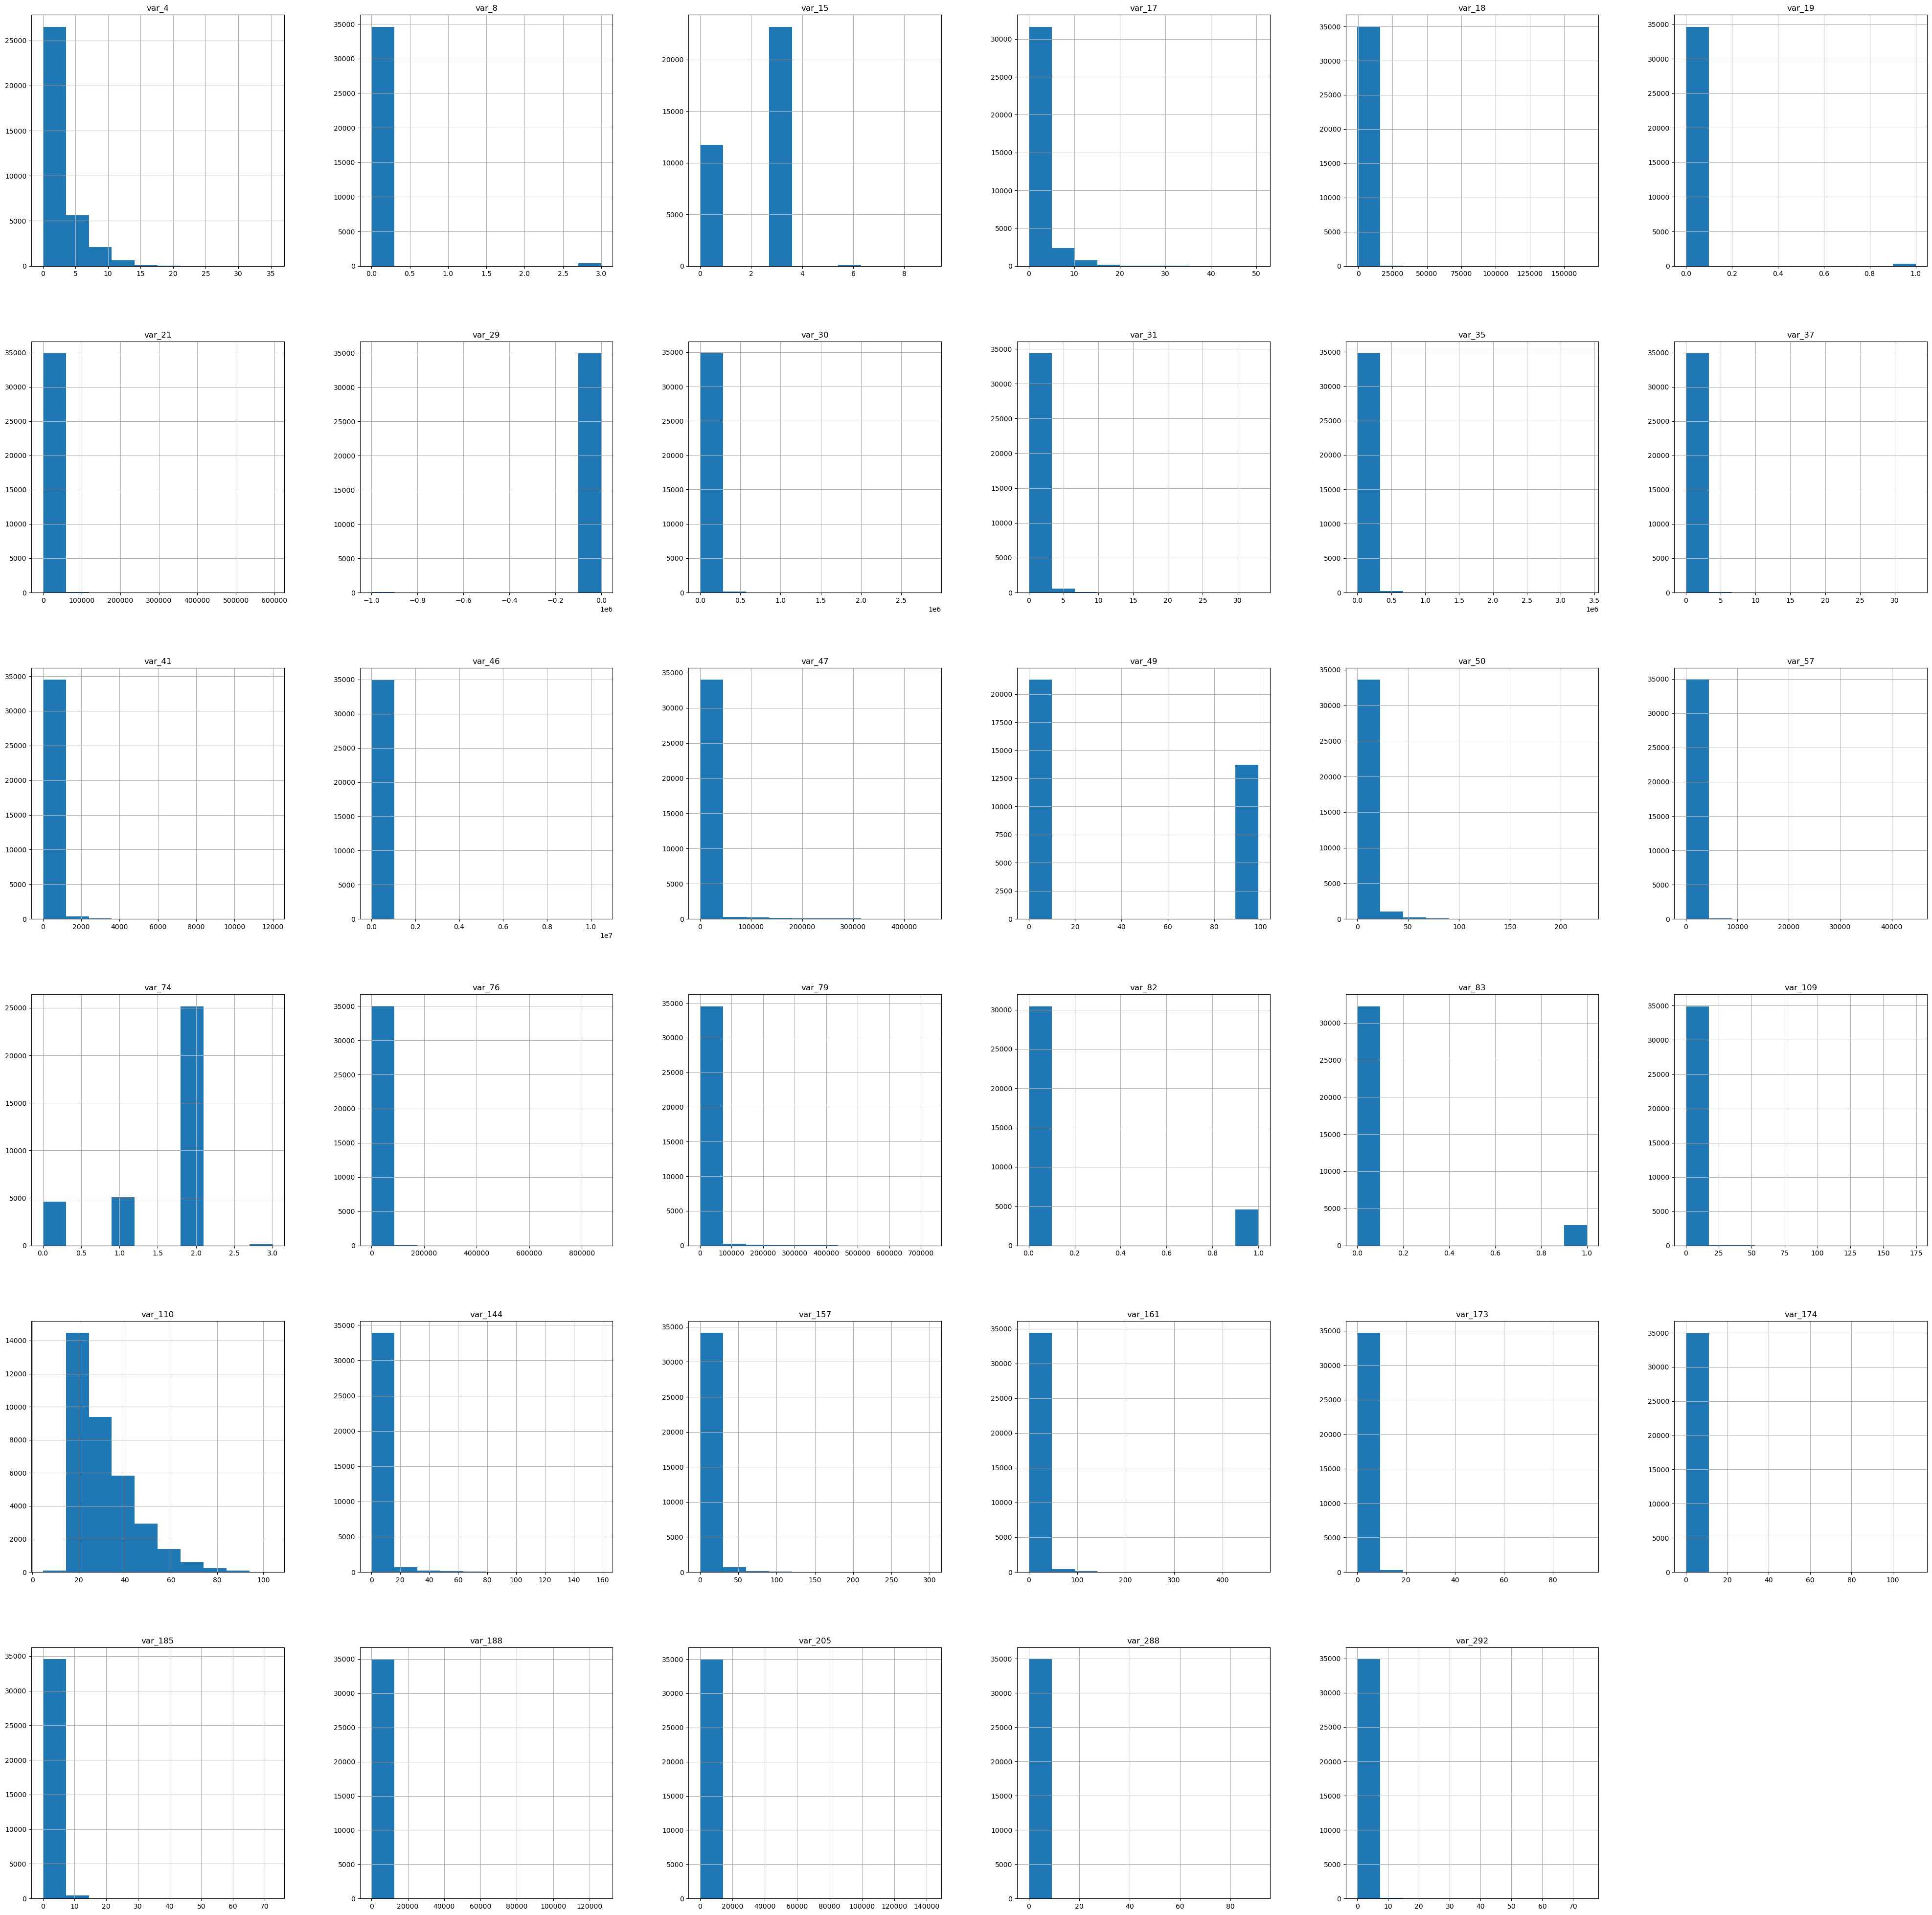

In [27]:
# take a look at dataframe so to find outliers
X_train.hist(figsize=(50, 50))

In [30]:
import numpy as np
from scipy.stats import zscore

# Calculate z-scores for each column
z_scores = np.abs(zscore(X_train))

def outliers_handler(df, z_scores=z_scores):
    z_scores = np.abs(zscore(df))
    # Set a threshold for the z-score values
    threshold = 2.5
    # Define the means_train dictionary
    means_train = {}

    # Loop over each column in X_train
    for column in df.columns:
        # Identify the rows where the z-score exceeds the threshold  
        outliers = z_scores.iloc[:, df.columns.get_loc(column)] > threshold

        # Calculate the mean of the column excluding outliers
        means_train[column] = np.nanmean(df[column][~outliers])

        # Replace values that exceed the threshold
        if outliers.any():
            values = df[column].values
            mean = means_train[column]
            std = np.std(values)
            mask = outliers
            for i in np.where(mask)[0]:
                if values[i] > mean:
                    # Find last value greater than mean and within 2.5 std
                    replacement_candidates = values[(values > mean) & ~outliers]
                    if len(replacement_candidates) > 0:
                        replacement = replacement_candidates[-1]
                    else:
                        replacement = mean
                else:
                    # Find last value less than mean and within 2.5 std
                    replacement_candidates = values[(values < mean) & ~outliers]
                    if len(replacement_candidates) > 0:
                        replacement = replacement_candidates[0]
                    else:
                        replacement = mean
                df.iloc[i, df.columns.get_loc(column)] = replacement

In [31]:
outliers_handler(X_test)

In [32]:
# evaluating outliers handler on X_train 
outliers_handler(X_train)

In [ ]:
X_train.shape

In [ ]:
# count the number of unique values in each column
unique_counts = X_train.nunique()

# identify the columns with only one unique value
single_value_cols = unique_counts[unique_counts == 1].index

# drop the columns with only one unique value
X_train = X_train.drop(single_value_cols, axis=1)

In [ ]:
print(df.isna().any().unique())

## 5.2. Handling NAs and/or Nulls

In [ ]:
# replace NAs with median

# nie zastępować nullami bo jak są binarne wartości to wszędzie da zera

medians_train = {}
for column in X_train.columns:
    medians_train[column]=X_train[column].median()
    X_train[column].fillna(medians_train[column], inplace=True)

## 5.3. Normalization or standarization

In [ ]:
from sklearn.preprocessing import StandardScaler

# scaler imported from sklearn instead of self written code
scaler = StandardScaler().fit(X_train)
scaler.transform(X_train)

## 5.4. Replacing NAs and/or Nulls

In [ ]:
# column can be empty in case all of its values were greater or equal to 97% quantile so all of them turned into NAs
# because of this median is also NA, thus column remains empty
empty = [column for column in X_train.columns if all(X_train[column].isna())]

# remove all empty columns as they do not influence on prediction
X_train.drop(columns=empty, inplace=True)

In [ ]:
# functions to pipeline - transformers   
def nan_handler(df, medians=medians_train):
    for column in df.columns:
        if column in medians:
            df[column].fillna(medians[column], inplace=True)
        else:
            df[column].fillna(df[column].median(), inplace=True)
        
def standarization_handler(df):
    scaler.transform(df)
        
def nan_removing(df):
    empty = [column for column in df.columns if all(df[column].isna())]
    df.drop(columns=empty, inplace=True)

# 6. SUMMARY

In [ ]:
X_train.hist(figsize=(50, 50))

In [ ]:
mc = X_train.corr(method="spearman")
sb.heatmap(mc, cmap="crest")

# 7 MODELS 

In [ ]:
def prepare_dataset(df, consistent_cols = []):
    if len(consistent_cols)==0:
        drop_duplicate_features(df)
        print("duplicated featured deleted")
        drop_constant_features(df)
        print("constant features dropped")
        drop_correlated_features(df)
        print("correlated features deleted")
    else:
        to_drop = filter(lambda i: i not in consistent_cols, df.columns)
        df.drop(columns = list(to_drop), inplace=True)
        print("columns consistent")
    outliers_handler(df)
    print("outliers removed")
    nan_handler(df)
    print("nan removed")
    standarization_handler(df)
    print("dataset standaraized")
    nan_removing(df)

prepare_dataset(X_test, X_train.columns)
print(X_test.shape, "TEST dataset")
print(X_train.shape, "TRAIN dataset")

In [ ]:
outliers_handler(X_test)

In [ ]:
# Train and test shape are the same
print(X_test.columns)
print(X_train.columns)
to_drop = filter(lambda i: i not in list(X_train.columns), list(X_test.columns))
X_test.drop(columns = list(to_drop), inplace=True)
print(list(to_drop))

### EVALUATING MODELS

In [ ]:
# importing ROC-AUC score to valuate models
from sklearn.metrics import roc_auc_score

# importing ROC curve to visualize ROC curve
from sklearn.metrics import roc_curve

# matplotlib to draw plots of ROC-AUC curve
import matplotlib.pyplot as plt

# confusion matrix to show TP, TN, FP, FN
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## 7.1 RANDOM FOREST

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, n_jobs=2)
rf_model.fit(X_train, y_train)

In [ ]:
y_pred_proba = rf_model.predict_proba(X_test)

In [ ]:
y_pred = rf_model.predict(X_test)

### EVALUATION OF RANDOM FOREST MODEL

In [ ]:
# roc curve for models
fpr_rf, tpr_rf, thresh_rf = roc_curve(y_test, y_pred_proba[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [ ]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr_rf, tpr_rf, linestyle='--',color='orange', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [ ]:
# auc scores
auc_score_rf = roc_auc_score(y_test, y_pred_proba[:,1])

print("Classification report: ", "\n" ,classification_report(y_test, y_pred))
print("Random Forest Score: ", rf_model.score(X_test,y_test))
print("AUC score: ", auc_score_rf)

In [ ]:
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test)
plt.show()

# 7.2 K Neighbors Classifier and Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# logistic regression
model1 = LogisticRegression()
# knn
model2 = KNeighborsClassifier(n_neighbors=4)

In [ ]:
# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

In [ ]:
# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)

In [ ]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [ ]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1, auc_score2)

In [ ]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

# Verify feature importance in random forest model

In [ ]:
feature_importances = pd.DataFrame(rf_model.feature_importances_,
                                   X_train.columns,
                                   columns=['Importance'])

In [ ]:
feature_importances.sort_values(by='Importance', ascending=False).head(10)

In [ ]:
feature_importances_2 = feature_importances.loc[feature_importances.index.isin(X_train_2)].sort_values(by='Importance', ascending=False)
feature_importances_2

In [ ]:
rf_model_2 = RandomForestClassifier(n_estimators=100)
rf_model_2.fit(X_train_2, y_train)

In [ ]:
y_pred_2 = rf_model_2.predict(X_test_2)

In [ ]:
print(classification_report(y_pred_2, y_test))

## 2nd EVALUATION OF RANDOM FOREST MODEL

# Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)

In [ ]:
lasso.fit(X_train, y_train)

In [ ]:
y_pred = lasso.predict(X_test)

In [ ]:
print(lasso.score(X_train,y_train))

In [ ]:
# zwraca mse - blad sredniokwadratowy

In [ ]:
# 
bin_y_pred = (y_pred > 0.5) * 1 

In [ ]:
# przekształcam wektor prawdopodobieństw z progiem 0.5

In [ ]:
print("Slope: %.2f" % lasso.coef_[0])

# Gradient Boosting model

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
# Create a gradient boosting regressor object
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=42)
# Train the model on the training data
gb.fit(X_train, y_train)

In [ ]:
# Make predictions on the testing data
y_pred_proba = gb.predict_proba(X_test)
y_pred = gb.predict(X_test)

### EVALUATION OF GRADIENT BOOSTING MODEL

In [ ]:
# roc curve for models
fpr_gb, tpr_gb, thresh_gb = roc_curve(y_test, y_pred_proba[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [ ]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr_gb, tpr_gb, linestyle='--',color='orange', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [ ]:
# auc scores
auc_score_gb = roc_auc_score(y_test, y_pred_proba[:,1])

print("Classification report: ", "\n" ,classification_report(y_test, y_pred))
print("Random Forest Score: ", gb_model.score(X_test,y_test))
print("AUC score: ", auc_score_gb)

In [ ]:
ConfusionMatrixDisplay.from_estimator(gb_model, X_test, y_test)
plt.show()

# XGBoost model

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [ ]:
# Create a DMatrix from the training data
dtrain = xgb.DMatrix(X_train, label=y_train)

# Set XGBoost parameters
params = {
    "objective": "reg:squarederror",
    "eta": 0.1,
    "max_depth": 3,
    "seed": 42,
}

In [ ]:
# Train the model
num_round = 100
bst = xgb.train(params, dtrain, num_round)


In [ ]:
# Make predictions on the testing data
dtest = xgb.DMatrix(X_test)
y_pred = bst.predict(dtest)

# Calculate the mean squared error of the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


# mse jest tylko dla zmiennych ciągłych a my mamy binarne, liczyć GIMME lub AUC

# EXPORTING

In [ ]:
# exporting preprocessed dataset to csv
relative_path = "./preprocessed"

if not os.path.exists(relative_path):
    os.makedirs(relative_path)
    
X_train.to_csv('preprocessed/train_dataset_1.csv', encoding='utf-8')